## Exploratory Data Analysis CCPD dataset
[SourceLink](https://github.com/detectRecog/CCPD)

In [56]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = '..//CCPD//CCPD2020//train//'

In [3]:
list_path = glob.glob(PATH + '*.jpg')

In [4]:
len(list_path)

5769

In [5]:
list_filenames = [list_path[i].split('/')[-1] for i in range(len(list_path))]

In [6]:
list_filenames[0]

'train\\00360785590278-91_265-311&485_406&524-406&524_313&520_311&485_402&489-0_0_3_24_28_24_31_33-117-16.jpg'

In [7]:
list_filenames[0].split('&')

['train\\00360785590278-91_265-311',
 '485_406',
 '524-406',
 '524_313',
 '520_311',
 '485_402',
 '489-0_0_3_24_28_24_31_33-117-16.jpg']

In [8]:
list_filenames[0].rsplit('.', 1)[0].split('-')[-3]

'0_0_3_24_28_24_31_33'

In [9]:
list_filenames[0].rsplit('.', 1)[0].split('-')

['train\\00360785590278',
 '91_265',
 '311&485_406&524',
 '406&524_313&520_311&485_402&489',
 '0_0_3_24_28_24_31_33',
 '117',
 '16']

In [10]:
list_path[0].split('/')[-1].rsplit('.', 1)[0].split('-')[-3]

'0_0_3_24_28_24_31_33'

In [11]:
iname = list_path[0].split('/', 1)[-1].rsplit('.', 1)[0].split('-')

In [12]:
iname

['/CCPD//CCPD2020//train\\00360785590278',
 '91_265',
 '311&485_406&524',
 '406&524_313&520_311&485_402&489',
 '0_0_3_24_28_24_31_33',
 '117',
 '16']

In [13]:
[leftUp, rightDown] = [[int(eel) for eel in el.split('&')] for el in iname[2].split('_')]

In [14]:
leftUp

[311, 485]

In [15]:
rightDown

[406, 524]

In [16]:
img = cv2.imread(list_path[0])

In [17]:
img.shape

(1160, 720, 3)

In [18]:
img_w, img_h = [float(int(el)) for el in [img.shape[1], img.shape[0]]]

In [19]:
labels = [(leftUp[0] + rightDown[0]) / (2 * img_w), (leftUp[1] + rightDown[1]) / (2 * img_h),
          (rightDown[0] - leftUp[0]) / img_w, (rightDown[1] - leftUp[1]) / img_h]

In [20]:
labels

[0.4979166666666667,
 0.4349137931034483,
 0.13194444444444445,
 0.03362068965517241]

In [21]:
from tqdm.notebook import tqdm


In [22]:
for file in tqdm(list_path):
    img = cv2.imread(file)
    iname = file.split('/', 1)[-1].rsplit('.', 1)[0].split('-')
    
    [leftUp, rightDown] = [[int(eel) for eel in el.split('&')] for el in iname[2].split('_')]
    img_w, img_h = [float(int(el)) for el in [img.shape[1], img.shape[0]]]
    
    normalized_bbox = [(leftUp[0] + rightDown[0]) / (2 * img_w), (leftUp[1] + rightDown[1]) / (2 * img_h),
          (rightDown[0] - leftUp[0]) / img_w, (rightDown[1] - leftUp[1]) / img_h]
    
    # TODO save the correct form to TXT format
    label_name=f'0 {normalized_bbox[0]:.3f} {normalized_bbox[1]:.3f} {normalized_bbox[2]:.3f} {normalized_bbox[3]:.3f}'
 
    # Name of the file which to save
   # save_file_name = os.path.join(list_path, list_filenames["normalized_bbox"].replace('jpg', 'txt'))
   # print(file)
    #print(label_name)
    filename = file.split('\\')[-1]
    #print(filename)
    save_file_name=os.path.join('CCPD2020/labels/train', filename.replace('jpg', 'txt'))
    #print(save_file_name)
    with open(save_file_name, 'w') as file:
        file.write(label_name)



  0%|          | 0/5769 [00:00<?, ?it/s]

In [28]:
file

<_io.TextIOWrapper name='CCPD2020/labels/train\\309474609375-90_96-50&410_617&578-603&578_57&578_50&410_617&421-0_0_3_24_30_33_30_30-79-386.txt' mode='w' encoding='cp949'>

In [37]:
file1='CCPD2020/labels/train\\309474609375-90_96-50&410_617&578-603&578_57&578_50&410_617&421-0_0_3_24_30_33_30_30-79-386.jpg'

In [39]:
file1.split('\\')[-1]

'309474609375-90_96-50&410_617&578-603&578_57&578_50&410_617&421-0_0_3_24_30_33_30_30-79-386.jpg'

In [41]:
list_path[0]

'..//CCPD//CCPD2020//train\\00360785590278-91_265-311&485_406&524-406&524_313&520_311&485_402&489-0_0_3_24_28_24_31_33-117-16.jpg'

In [45]:
list_path[0].split('//')

['..',
 'CCPD',
 'CCPD2020',
 'train\\00360785590278-91_265-311&485_406&524-406&524_313&520_311&485_402&489-0_0_3_24_28_24_31_33-117-16.jpg']

In [49]:
'//'.join(list_path[0].split('//')[:3]) + '//' + 'labels//' + list_path[0].split('//')[-1].replace('jpg', 'txt')


'..//CCPD//CCPD2020//labels//train\\00360785590278-91_265-311&485_406&524-406&524_313&520_311&485_402&489-0_0_3_24_28_24_31_33-117-16.txt'

In [62]:
ann_file=list_path[0].split('//')[2] + '//' + 'labels//' + list_path[0].split('//')[-1].replace('jpg', 'txt')


In [66]:
ann_file = 'CCPD2020/labels/train/00360785590278-91_265-311&485_406&524-406&524_313&520_311&485_402&489-0_0_3_24_28_24_31_33-117-16.txt'

In [73]:
with open(ann_file, 'r') as f:
    print(f)
    ann_list = f.read().split('\n')
    # ann_list = f.read()
    print(ann_list)
    ann_list = [x.split(' ') for x in ann_list]
    print(ann_list)
    ann_list = [[float(y) for y in x] for x in ann_list]

<_io.TextIOWrapper name='CCPD2020/labels/train/00360785590278-91_265-311&485_406&524-406&524_313&520_311&485_402&489-0_0_3_24_28_24_31_33-117-16.txt' mode='r' encoding='cp949'>
['0 0.498 0.435 0.132 0.034']
[['0', '0.498', '0.435', '0.132', '0.034']]


In [68]:
ann_list

[]

In [76]:
def plot_bbox(image, anns):
    anns = np.array(anns)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    
    transformed_anns = np.copy(anns)
    transformed_anns[:, [1, 3]] = anns[:, [1, 3]] * w
    transformed_anns[:, [2, 4]] = anns[:, [2, 4]] * h
    
    transformed_anns[:, 1] = transformed_anns[:, 1] - (transformed_anns[:, 3] / 2)
    transformed_anns[:, 2] = transformed_anns[:, 2] - (transformed_anns[:, 4] / 2)
    transformed_anns[:, 3] = transformed_anns[:, 1] + transformed_anns[:, 3]
    transformed_anns[:, 4] = transformed_anns[:, 2] + transformed_anns[:, 4]
    
    for ann in transformed_anns:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0, y0), (x1, y1)))
        
        plotted_image.text((x0, y0 - 10), "license")
        
    plt.imshow(np.array(image))
    plt.show()

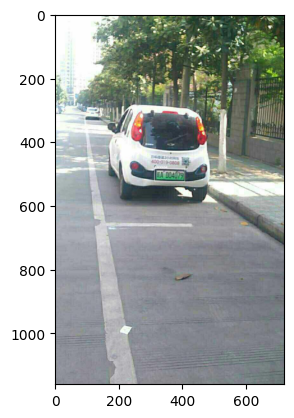

In [79]:
# Load the image
image = Image.open(list_path[0])

# Plot bbox
plot_bbox(image, ann_list )